# 泰坦尼克号幸存者预测
## 基于sklearn构造Decision Tree

In [101]:
# 导入几个基本库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [104]:
df['Survived'].mean()

0.3838383838383838

In [105]:
calss_grouping=df.groupby('Pclass').mean()
calss_grouping

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [106]:
class_sex_grouping = df.groupby(['Pclass','Sex']).mean()
class_sex_grouping

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

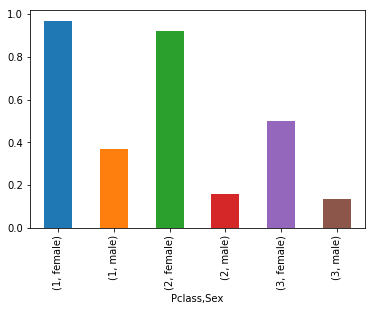

In [107]:
class_sex_grouping['Survived'].plot.bar()

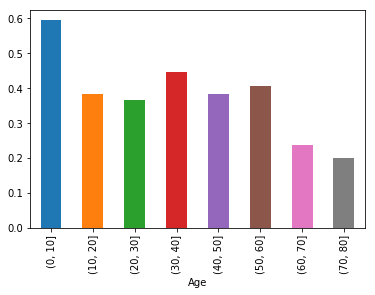

In [108]:
group_by_age = pd.cut(df["Age"], np.arange(0, 90, 10))
age_grouping = df.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

In [109]:
df_test=pd.read_csv('test.csv')
df_test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [110]:
# import re

# # 从名称中获取标题的函数。
# def get_title(name):
#     # 使用正则表达式搜索标题。 标题总是由大写和小写字母组成，并以句点结尾。
#     title_search = re.search(' ([A-Za-z]+)\.', name)
#     # 如果标题存在，请提取并返回。
#     if title_search:
#         return title_search.group(1)
#     return ""

# # 获取所有标题并打印每个标题出现的频率。
# titles = df["Name"].apply(get_title)
# print(pd.value_counts(titles))

# # 将每个标题映射到一个整数。 有些标题非常罕见，并且被压缩成与其他标题相同的代码。
# title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
# for k,v in title_mapping.items():
#     titles[titles == k] = v

# # 确认我们已转换所有内容。
# print(pd.value_counts(titles))

# # 添加标题列。
# df["Title"] = titles

In [125]:
import re

def get_titles(df):
#     name = df["Name"]
#     df["Title"] = ""
    a = []
#     i = 0
    for n in df["Name"]:
        title_search = re.search(' ([A-Za-z]+)\.', n)
        # 如果标题存在，请提取并返回。
        if title_search:
            a.append(title_search.group(1))
        else:
            a.append("")
#         i +=1
    df["Title"] = a
# 获取所有标题并打印每个标题出现的频率。
get_titles(df)
print(df["Title"].head())
print(pd.value_counts(df["Title"]))

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Ms            1
Countess      1
Don           1
Jonkheer      1
Sir           1
Capt          1
Lady          1
Mme           1
Name: Title, dtype: int64


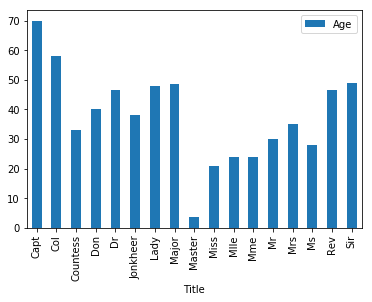

In [126]:
# 不同称谓的年龄中位数
get_titles(df)
title_age_grouping=df[['Title','Age']].groupby('Title').median()
title_age_grouping.plot.bar()

In [127]:
# 补全年龄的函数
def fill_ages(df,title_age_grouping):
    for i in range(len(df.index)):
        for j in range(len(title_age_grouping.index)):
            if df.loc[i,'Title'] == title_age_grouping.index[j] and np.isnan(df.loc[i,'Age']):
                df.loc[i,'Age']=title_age_grouping.Age[j]

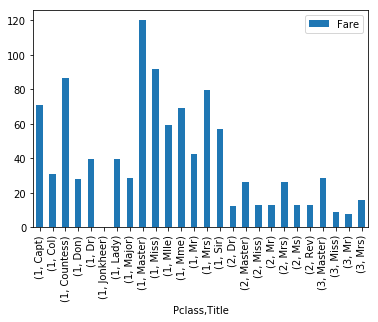

In [128]:
# 不同客舱等级和称谓的票价中位数
class_title_fare_grouping=df[['Pclass','Title','Fare']].groupby(['Pclass','Title']).median()
class_title_fare_grouping.plot.bar()

In [129]:
# 补全票价的函数
def fill_fares(df,class_title_fare_grouping):
    for i in range(len(df.index)):
        for j in range(len(class_title_fare_grouping.index)):
            if (df.loc[i,'Pclass'], df.loc[i,'Title'])== class_title_fare_grouping.index[j] and np.isnan(df.loc[i,'Fare']):
                df.loc[i,'Fare']=class_title_fare_grouping.Fare[j]

### 最后总体处理
#### 1.把上面的补全年龄和票价的函数用在数据集上，
#### 2.先将'Cabin'列drop掉，因为缺少很多数据，并且我没想到怎么样补全客舱数据，
#### 3.将缺少数据的行用df.dropna()清理掉，
#### 4.再将无用的行'PassengerId','Name','Ticket'列drop掉，
#### 5.编码

In [132]:
from sklearn import preprocessing

def preprocess_titanic_df(df,title_age_grouping,class_title_fare_grouping):
    #copy
    processed_df = df.copy()
    #get titles
    get_titles(processed_df)
    #fill missing ages
    fill_ages(processed_df,title_age_grouping)
    #fill missing fares
    fill_fares(processed_df,class_title_fare_grouping)
    #drop cabin variable
    processed_df = processed_df.drop(['Cabin'], axis=1)
    #drop na
    processed_df = processed_df.dropna()
    #label encoder
    le = preprocessing.LabelEncoder()
    processed_df.Sex = le.fit_transform(processed_df.Sex)
    processed_df.Embarked = le.fit_transform(processed_df.Embarked)
    processed_df.Title = le.fit_transform(processed_df.Title)
    processed_df = processed_df.drop(['PassengerId','Name','Ticket'],axis=1)
    return processed_df

In [133]:
processed_df = preprocess_titanic_df(df,title_age_grouping,class_title_fare_grouping)
processed_df.count()

Survived    889
Pclass      889
Sex         889
Age         889
SibSp       889
Parch       889
Fare        889
Embarked    889
Title       889
dtype: int64

In [137]:
from sklearn import model_selection

X = processed_df.drop(['Survived'], axis=1).values
y = processed_df['Survived'].values
                
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)  

print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (711, 8)
y_train (711,)
X_test (178, 8)
y_test (178,)


<BarContainer object of 19 artists>

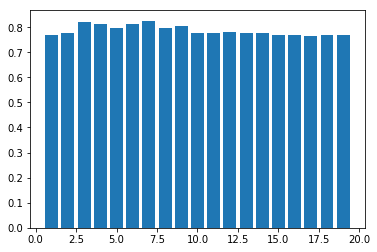

In [140]:
# Decision Tree

from sklearn import tree
score=[]
for i in range(1,20):
    clf_dt = tree.DecisionTreeClassifier(max_depth=i)
    clf_dt.fit (X_train, y_train)
    score.append(clf_dt.score (X_test, y_test))
plt.bar(range(1,20),score)

In [154]:
from sklearn import model_selection
clf_dt = tree.DecisionTreeClassifier(max_depth=3)
# shuffle_validator = model_selection.ShuffleSplit(len(X), n_iter=20, test_size=0.2, random_state=0)
shuffle_validator = model_selection.ShuffleSplit(n_splits = 30, test_size=0.2, random_state=0)
def test_classifier(clf):
    scores = model_selection.cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))
test_classifier(clf_dt)

Accuracy: 0.8242 (+/- 0.03)
